# Network Visualization

[Alex Hanna](http://alex-hanna.com), University of Toronto/Google

*NB: A good deal of this is adapted from [Katya Ognyanova's polnet tutorial on network visualization](http://kateto.net/network-visualization). This is, by far, the best treatment of network visualization in R I've seen anywhere. Check it out.*

In this module, we aim to do an introduction to network visualization in R. We have the following objectives:

- Understand why we want to use visualization
- Differentiate where some types of network visualization may be better than others
- Learn how to use most common elements of the igraph package
- Understand differences in graph layouts
- Learn how to use most common parts of the visNetwork package

![Network viz purpose](img/network-purpose.png)

When we envision network visualization, we often think of a big hairball type of network which illustrates all the nodes in some kind of connectivity between the network. However, network visualizations don't have to be that way. We can use network visualization as a means of illustrating a bunch of different things. This graphic from Katya Ognayanova does a good and brief job of showing what the different purposes are for network visualization.

1. Key actors and links
    - Showing how a particular actor or link is central to a larger network
2. Relationship strength
    - Comparing how one set of nodes are more strongly conencted than another
3. Structural properties
    - Highlighting the unique structural properties of a network and its components.
4. Communities
    - Illustrating the different communities and subcommunities in a graph.
5. Diffusion and diffusion patterns
    - Showing how particular behaviors spread through a graph
6. Network evolution
    - Illustrating the over time development of tie formation, tie deletion, and how that impacts the structure as a whole
7. Networks as maps, networks as persuasion, networks as art
    - These purposes pay less attention to the particular structure of the graph, but more to the aesthetic and information dissemination qualities of a graph.

![Network viz types](img/network-viz-types.png)

The network map also doesn't have to be the only way we highlight all of these things. Maps are one of several different methods of illustrating network connections. 

- Most network studies will typically use more traditional methods of data visualization -- like histograms, line graphs, and scatter plots -- to highlight important network properties, along side a network map or something similar. 
- The [arc diagram](http://datavizproject.com/data-type/arc-diagram/) can be a helpful way in illustrating networked communities, although we lose some information on structure. 
- The [heat map](http://datavizproject.com/data-type/heat-map/) can be a good way to illustrate weighted data as well as community connections. It looks more or less like an adjaceny matrix as well.
- The [hive plot](http://datavizproject.com/data-type/hive-plot/) is a method of visualizing large networks which aligns nodes along three axises and draws the connections between them.
- [Biofabric](http://www.biofabric.org/) is a one-dimension way of illustrating very large networks (although the project looks like it hasn't seen much development since 2013).

### Revisiting some examples

In the first module, we created a few visualizations to illustrate some features of the networks we were interrogating. Let's revisit the Paul Revere metadata.

In [7]:
library(igraph)
data.revere <- read.csv("data/PaulRevereAppD.csv", row.names = 1)
bipartite.revere <- graph.incidence(data.revere)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



First, let's look at the basic information given to us by typing out the network variable.

In [8]:
bipartite.revere

IGRAPH 57f7c54 UN-B 261 319 -- 
+ attr: type (v/l), name (v/c)
+ edges from 57f7c54 (vertex names):
 [1] Adams.John        --NorthCaucus     Adams.John        --LongRoomClub   
 [3] Adams.Samuel      --NorthCaucus     Adams.Samuel      --LongRoomClub   
 [5] Adams.Samuel      --BostonCommittee Adams.Samuel      --LondonEnemies  
 [7] Allen.Dr          --NorthCaucus     Appleton.Nathaniel--NorthCaucus    
 [9] Appleton.Nathaniel--BostonCommittee Ash.Gilbert       --StAndrewsLodge 
[11] Austin.Benjamin   --LondonEnemies   Austin.Samuel     --LondonEnemies  
[13] Avery.John        --LoyalNine       Avery.John        --LondonEnemies  
[15] Baldwin.Cyrus     --LondonEnemies   Ballard.John      --NorthCaucus    
+ ... omitted several edges

The first line tells us a few things.

    IGRAPH 57f7c54 UN-B 261 319 -- 
    
- It's an `igraph` object with a unique identifier (`57f7c54`). 
- `U` denotes that it's undirected (if it was directed it'd be `D`)
- `N` tells us that this network has named elements
- `-` means that it is unweighted. If was weighted, it would read `W`.
- `B` means that it is a bipartite (two-mode) network.

The two numbers that follow (261 319) refer to the number of nodes and edges in the network. The description also lists node & edge attributes, for example:

- `type (v/l)` - vertex-level attribute, in this case whether it is a person or organization
- `name (v/c)` - vertex-level character attribute, in this case the name of the node
- If there were weights to these edges, that would show up as something like `(e/n)`

We also have a very basic visualization in this description, showing us the first 16 edges in the network. Obviously there are more edges which aren't being shown here.

At the end of the last module, we used `V` and `E` to directly access the nodes and edges. Let's look at them in more detail.

In [21]:
V(bipartite.revere)

+ 261/261 vertices, named, from 57f7c54:
  [1] Adams.John            Adams.Samuel          Allen.Dr             
  [4] Appleton.Nathaniel    Ash.Gilbert           Austin.Benjamin      
  [7] Austin.Samuel         Avery.John            Baldwin.Cyrus        
 [10] Ballard.John          Barber.Nathaniel      Barnard.Samuel       
 [13] Barrett.Samuel        Bass.Henry            Bell.William         
 [16] Blake.Increase        Boit.John             Bolter.Thomas        
 [19] Boyer.Peter           Boynton.Richard       Brackett.Jos         
 [22] Bradford.John         Bradlee.David         Bradlee.Josiah       
 [25] Bradlee.Nathaniel     Bradlee.Thomas        Bray.George          
 [28] Breck.William         Bewer.James           Brimmer.Herman       
+ ... omitted several vertices

In [22]:
E(bipartite.revere)

+ 319/319 edges from 57f7c54 (vertex names):
 [1] Adams.John        --NorthCaucus     Adams.John        --LongRoomClub   
 [3] Adams.Samuel      --NorthCaucus     Adams.Samuel      --LongRoomClub   
 [5] Adams.Samuel      --BostonCommittee Adams.Samuel      --LondonEnemies  
 [7] Allen.Dr          --NorthCaucus     Appleton.Nathaniel--NorthCaucus    
 [9] Appleton.Nathaniel--BostonCommittee Ash.Gilbert       --StAndrewsLodge 
[11] Austin.Benjamin   --LondonEnemies   Austin.Samuel     --LondonEnemies  
[13] Avery.John        --LoyalNine       Avery.John        --LondonEnemies  
[15] Baldwin.Cyrus     --LondonEnemies   Ballard.John      --NorthCaucus    
[17] Barber.Nathaniel  --NorthCaucus     Barber.Nathaniel  --TeaParty       
[19] Barber.Nathaniel  --BostonCommittee Barber.Nathaniel  --LondonEnemies  
+ ... omitted several edges

`V` seems to give the names of each of the nodes while `E` gives a summary of some of the connections. We can also use `V` and `E` to directly access some of the nodes.

In [26]:
V(bipartite.revere)[name == 'Adams.Samuel']

+ 1/261 vertex, named, from 57f7c54:
[1] Adams.Samuel

In the two-mode network, we use the `type` variable to check which of the modes the node is in. This is represented a boolean vector.

In [29]:
table(V(bipartite.revere)$type)


FALSE  TRUE 
  254     7 

### Exercise 1

1. Load a basic network. Type that network's name. What can you tell by the first line? How about the other lines?

### `igraph` visualization options

Let's revisit the visualization we used to highlight the two-mode network and the organizations, with a few added bonuses.

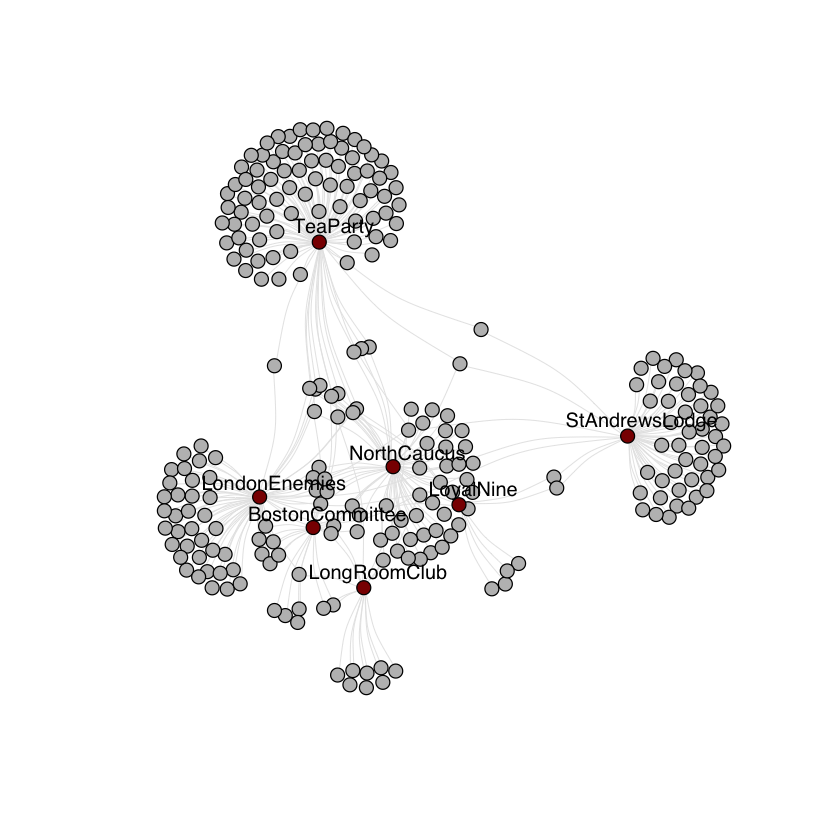

In [16]:
plot(bipartite.revere, 
     vertex.color = ifelse(V(bipartite.revere)$type, "dark red", "gray"),
     vertex.size = 5,
     vertex.label = ifelse(V(bipartite.revere)$type, V(bipartite.revere)$name, NA),
     vertex.label.dist = 1,
     vertex.label.family = "Helvetica",
     vertex.label.color = "black",
     edge.color = "gray90",
     edge.width = 0.75,
     edge.curved = 0.2)

You may see a bit of a pattern here. Everything that has to do with the node itself in the arguments begins with `vertex`. Anything that has to do with the node names begins with `vertex.label`. We've added a few options here that have to do with the edges. Those, intuitively, begin with the keyword `edge`.

- Highlighting different aspects of a graph
- Highlighting particular nodes and edges
- Alternative graphs
    - Heatmap
    - Arcplot
    - Statistical charts
    - Biofabrics
- Interactive visualization
    - visNetwork
    - d3

The igraph plotting parameters include (among others). You can get the full documentation on igraph plotting by going here or by typing `?igraph.plotting` into your R console.

Type  | Argument | Description
------|----------|---
NODES |          |
| vertex.color | Node color
| vertex.frame.color | Node border color
| vertex.shape | One of “none”, “circle”, “square”, “csquare”, “rectangle”, “crectangle”, “vrectangle”, “pie”, “raster”, or “sphere”
| vertex.size  | Size of the node (default is 15)
| vertex.size2 | The second size of the node (e.g. for a rectangle)
| vertex.label | Character vector used to label the nodes
| vertex.label.family | Font family of the label (e.g.“Times”, “Helvetica”)
| vertex.label.font   | Font: 1 plain, 2 bold, 3, italic, 4 bold italic, 5 symbol
| vertex.label.cex | Font size (multiplication factor, device-dependent)
| vertex.label.dist | Distance between the label and the vertex
| vertex.label.degree | The position of the label in relation to the vertex, where 0 is right, “pi” is left, “pi/2” is below, and “-pi/2” is above
EDGES | |
| edge.color | Edge color
| edge.width | Edge width, defaults to 1
| edge.arrow.size | Arrow size, defaults to 1
| edge.arrow.width | Arrow width, defaults to 1
| edge.lty | Line type, could be 0 or “blank”, 1 or “solid”, 2 or “dashed”, 3 or “dotted”, 4 or “dotdash”, 5 or “longdash”, 6 or “twodash”
| edge.label | Character vector used to label edges
| edge.label.family | Font family of the label (e.g.“Times”, “Helvetica”)
| edge.label.font | Font: 1 plain, 2 bold, 3, italic, 4 bold italic, 5 symbol
| edge.label.cex | Font size for edge labels
| edge.curved | Edge curvature, range 0-1 (FALSE sets it to 0, TRUE to 0.5)
| arrow.mode  | Vector specifying whether edges should have arrows, possible values: 0 no arrow, 1 back, 2 forward, 3 both
OTHER |  | 
| margin | Empty space margins around the plot, vector with length 4
| frame | if TRUE, the plot will be framed
| main | If set, adds a title to the plot
| sub | If set, adds a subtitle to the plot
| asp | Numeric, the aspect ratio of a plot (y/x).
| palette | A color palette to use for vertex color
| rescale | Whether to rescale coordinates to [-1,1]. Default is TRUE.

In [ ]:
- Size
- Edge width
- Edge curve
- Color
- Layouts